In [41]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import joblib

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# from lazypredict.Supervised import LazyRegressor

plt.rcParams['savefig.dpi'] = 144

%matplotlib inline

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [53]:
df = pd.read_csv("/content/drive/MyDrive/web_crawler/data/processing_car.csv")
df.head(5)

,Price,CarBrand,CarModel,MfgDate,Mileage,Condition,GearBox,Fuel,CarOrigin,CarType,CarSeats
0,9.400000e+08,Vinfast,VF8,2023.0,0.0,Mới,Tự động,Điện,Việt Nam,SUV,5.0
1,9.990000e+08,Hyundai,Santa Fe,2021.0,20000.0,Đã sử dụng,Tự động,Xăng,Việt Nam,SUV,7.0
2,1.058000e+09,Hyundai,Santa Fe,2021.0,24000.0,Đã sử dụng,Tự động,Dầu,Việt Nam,SUV,7.0
3,4.600000e+08,Mazda,3,2018.0,44658.0,Đã sử dụng,Tự động,Xăng,Việt Nam,Sedan,5.0
4,4.150000e+08,Lexus,GS,2007.0,135000.0,Đã sử dụng,Tự động,Xăng,Mỹ,Sedan,4.0


In [43]:
# df_sample = df.sample(n=1000, random_state=42)
# df_sample.to_csv('/content/drive/MyDrive/web_crawler/data/_small_processing_car.csv', index=False, encoding='utf-8')

In [69]:
df = pd.read_csv("/content/drive/MyDrive/web_crawler/data/_small_processing_car.csv")
df.tail(5)

,Price,CarBrand,CarModel,MfgDate,Mileage,Condition,GearBox,Fuel,CarOrigin,CarType,CarSeats
995,259000000.0,Chevrolet,Cruze,2017.0,95000.0,Đã sử dụng,Số sàn,Xăng,Việt Nam,Sedan,5.0
996,228000000.0,Toyota,Vios,2014.0,108000.0,Đã sử dụng,Số sàn,Xăng,Việt Nam,Sedan,5.0
997,610000000.0,Mazda,CX 5,2018.0,55000.0,Đã sử dụng,Tự động,Xăng,Việt Nam,SUV,5.0
998,719000000.0,Toyota,Innova,2022.0,19000.0,Đã sử dụng,Số sàn,Xăng,Việt Nam,MPV,10.0
999,519000000.0,Kia,Sonet,2022.0,0.0,Mới,Tự động,Xăng,Việt Nam,SUV,5.0


In [70]:
# Lấy ngẫu nhiên 1000 dữ liệu

# Tách cột 'Price' ra khỏi DataFrame và lưu vào y
y = df['Price']
df = df.drop('Price', axis=1)

# # Chọn các cột dữ liệu phân loại cần mã hóa
categorical_columns = ['CarBrand', 'CarModel', 'Condition', 'GearBox', 'Fuel', 'CarOrigin', 'CarType']

# Thực hiện mã hóa one-hot
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)

In [71]:

encoded_columns = df.columns
encoded_columns



Index(['MfgDate', 'Mileage', 'CarSeats', 'CarBrand_BMW', 'CarBrand_Bentley',
       'CarBrand_Cadillac', 'CarBrand_Chevrolet', 'CarBrand_Daewoo',
       'CarBrand_Ford', 'CarBrand_Haval',
       ...
       'CarOrigin_Đài Loan', 'CarOrigin_Đức', 'CarOrigin_Ấn Độ',
       'CarType_Hatchback', 'CarType_MPV', 'CarType_Mui trần',
       'CarType_Pick up', 'CarType_SUV', 'CarType_Sedan', 'CarType_Van'],
      dtype='object', length=240)

In [72]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 1, 2, 3],
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
# Fit mô hình trên tập train và validation
grid_search.fit(X_train, y_train)
# In ra siêu tham số tốt nhất và điểm số tương ứng
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Negative MAE): ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': None, 'n_estimators': 200}
Best Score (Negative MAE):  -94328292.53852941


In [22]:
class ModelRandomForestRegressor:

    def __init__(self, model=None):
        if model == None:
            self.model = RandomForestRegressor()
        else:
            self.model = model

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        self.y_pred = self.model.predict(X_test)
        return self.y_pred

    def evaluate(self, y_true, y_pred):
        self.score_mae = mean_absolute_error(y_test, y_pred)
        self.score_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
        self.score_mape = mean_absolute_percentage_error(y_test, y_pred)
        self.score_r2 = r2_score(y_test, y_pred)

        print(f"MAE: {self.score_mae:.05f}")
        print(f"RMSE: {self.score_rmse:.05f}")
        print(f"MAPE: {self.score_mape:.05f}")
        print(f"R2_SQUARE: {self.score_r2:.05f}")

        return self.score_mae, self.score_rmse, self.score_mape, self.score_r2

    def plot_line(self, width, height, X_test, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)

        sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=self.y_pred[0:100], ax=ax, color='red', label='Giá trị dự đoán')
        sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=y_test[0:100], ax=ax, color='green', label='Giá trị thực tế')

        ax.set_title('Biểu đồ đường giá xe dự đoán và thực thế')
        ax.set_xlabel(xlabel='Sample', fontsize=14)
        ax.set_ylabel(ylabel='Price', fontsize=14)
        plt.show()

    def plot_scatter(self, width, height, y_pred, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        plt.scatter(y_test, y_pred, color='red')
        plt.plot(y_test, y_test)
        plt.grid()
        plt.xlabel('Giá thực tế')
        plt.ylabel('Giá dự đoán')
        plt.title('Biểu đồ phân tán giá xe dự đoán và thực thế')
        plt.show()

    def plot_residuals(self, width, height, y_pred, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        residuals = y_pred - y_test

        # Vẽ biểu đồ Residuals
        plt.scatter(y_test, residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Price')
        plt.ylabel('Residuals')
        plt.title('Biểu đồ dư thừa giá xe dự đoán và thực tế')
        plt.show()

MAE: 97670382.00798
RMSE: 169097499.85807
MAPE: 0.22984
R2_SQUARE: 0.75279


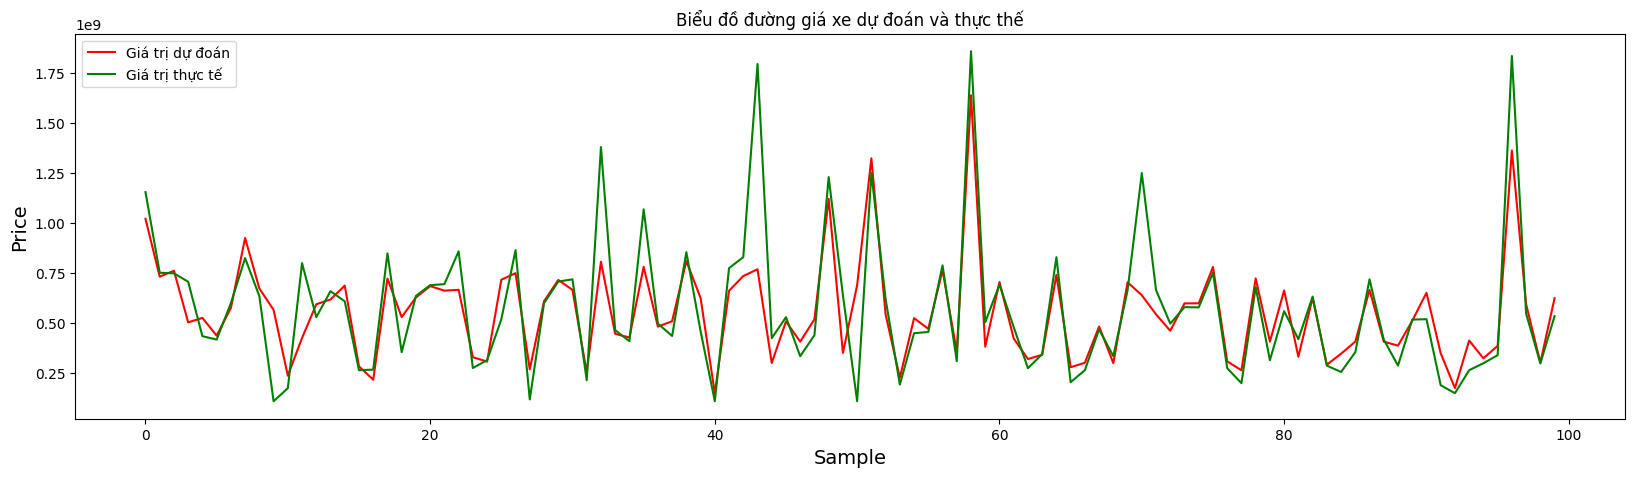

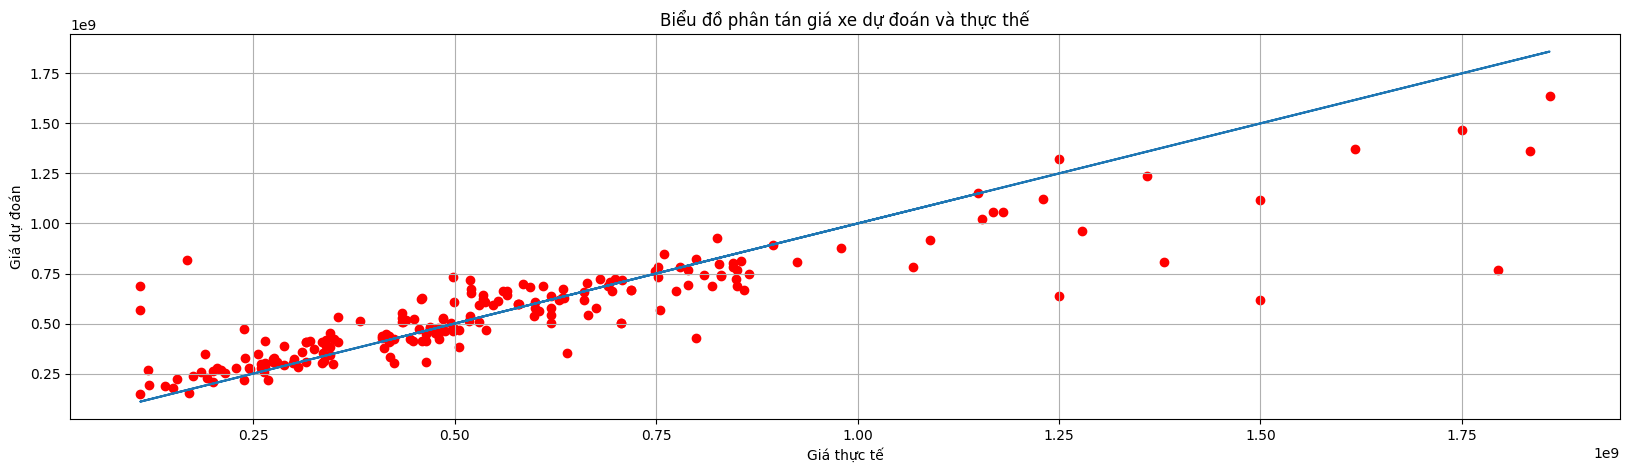

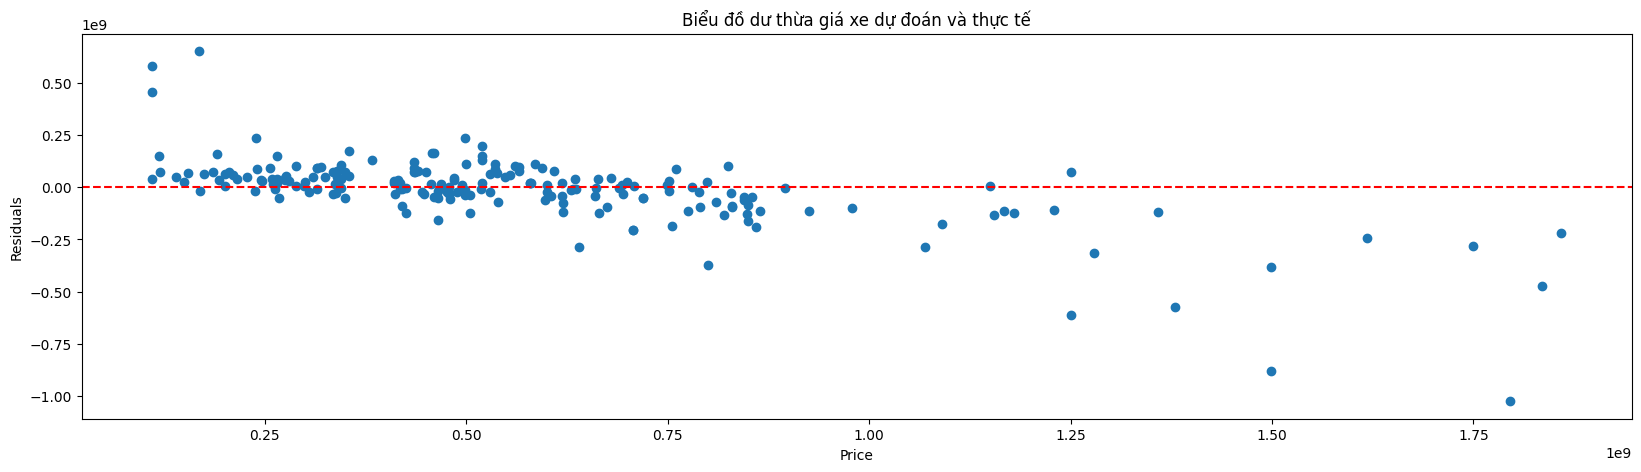

In [73]:
model = RandomForestRegressor(**grid_search.best_params_)
rf_reg = ModelRandomForestRegressor(model)
rf_reg.train(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)
rf_score_mae, rf_score_rmse, rf_score_mape, rf_r2 = rf_reg.evaluate(y_test, rf_y_pred)
rf_reg.plot_line(20, 5, X_test, y_test)
rf_reg.plot_scatter(20, 5, rf_y_pred, y_test)
rf_reg.plot_residuals(20, 5, rf_y_pred, y_test)

MAE: 109432328.18091
RMSE: 174911936.52605
MAPE: 0.28726
R2_SQUARE: 0.73549


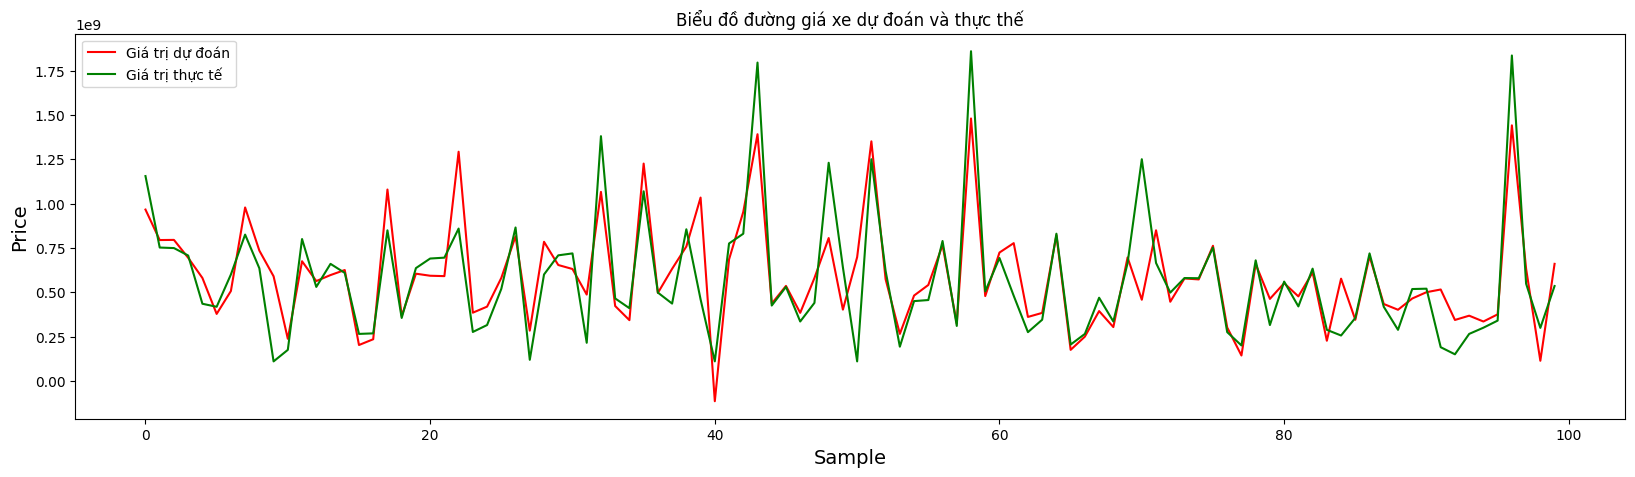

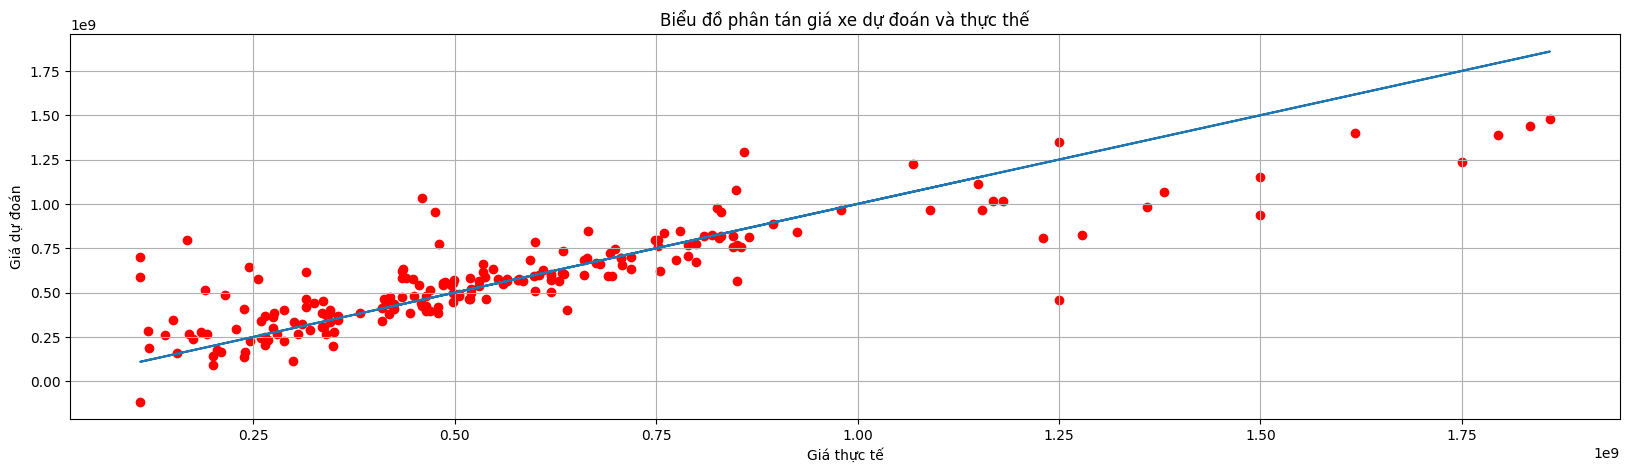

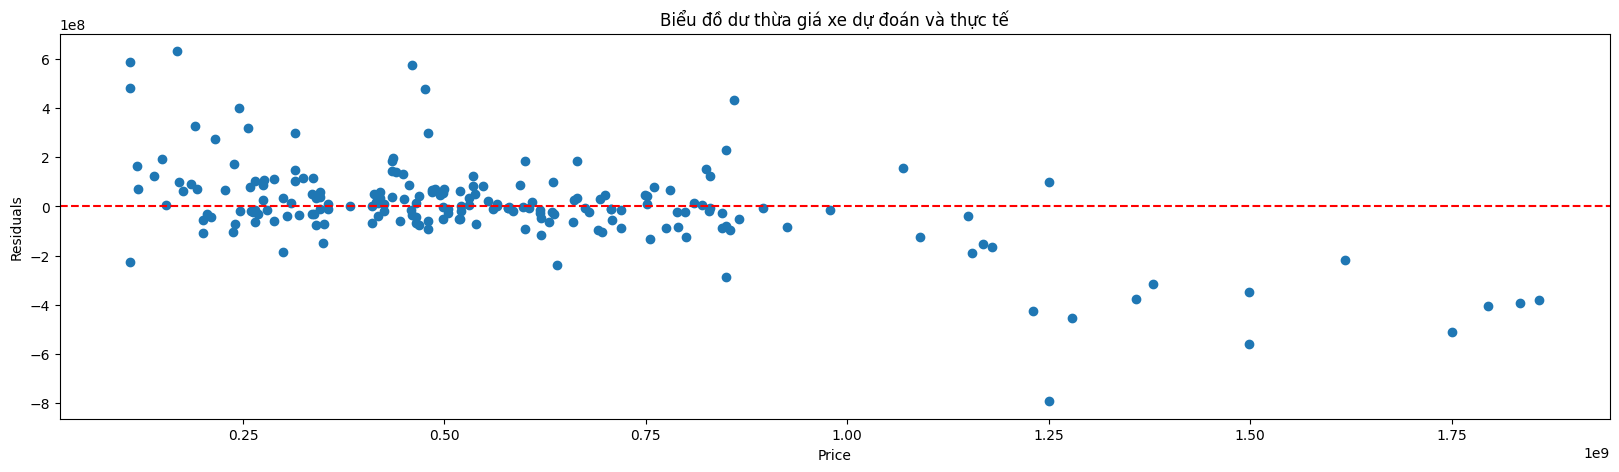

In [ ]:
from sklearn.linear_model import LinearRegression

class ModelLinearRegressor:

    def __init__(self, model=None):
        if model is None:
            self.model = LinearRegression()
        else:
            self.model = model

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        self.y_pred = self.model.predict(X_test)
        return self.y_pred

    def evaluate(self, y_true, y_pred):
        self.score_mae = mean_absolute_error(y_true, y_pred)
        self.score_rmse = math.sqrt(mean_squared_error(y_true, y_pred))
        self.score_mape = mean_absolute_percentage_error(y_true, y_pred)
        self.score_r2 = r2_score(y_true, y_pred)

        print(f"MAE: {self.score_mae:.05f}")
        print(f"RMSE: {self.score_rmse:.05f}")
        print(f"MAPE: {self.score_mape:.05f}")
        print(f"R2_SQUARE: {self.score_r2:.05f}")

        return self.score_mae, self.score_rmse, self.score_mape, self.score_r2

    def plot_line(self, width, height, X_test, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)

        sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=self.y_pred[0:100], ax=ax, color='red', label='Giá trị dự đoán')
        sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=y_test[0:100], ax=ax, color='green', label='Giá trị thực tế')

        ax.set_title('Biểu đồ đường giá xe dự đoán và thực thế')
        ax.set_xlabel(xlabel='Sample', fontsize=14)
        ax.set_ylabel(ylabel='Price', fontsize=14)
        plt.show()

    def plot_scatter(self, width, height, y_pred, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        plt.scatter(y_test, y_pred, color='red')
        plt.plot(y_test, y_test)
        plt.grid()
        plt.xlabel('Giá thực tế')
        plt.ylabel('Giá dự đoán')
        plt.title('Biểu đồ phân tán giá xe dự đoán và thực thế')
        plt.show()

    def plot_residuals(self, width, height, y_pred, y_test):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        residuals = y_pred - y_test

        # Vẽ biểu đồ Residuals
        plt.scatter(y_test, residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Price')
        plt.ylabel('Residuals')
        plt.title('Biểu đồ dư thừa giá xe dự đoán và thực tế')
        plt.show()

# Create a linear regression model with the best parameters from the grid search
linear_model = LinearRegression()
linear_reg = ModelLinearRegressor(linear_model)
linear_reg.train(X_train, y_train)
linear_y_pred = linear_reg.predict(X_test)
linear_score_mae, linear_score_rmse, linear_score_mape, linear_r2 = linear_reg.evaluate(y_test, linear_y_pred)
linear_reg.plot_line(20, 5, X_test, y_test)
linear_reg.plot_scatter(20, 5, linear_y_pred, y_test)
linear_reg.plot_residuals(20, 5, linear_y_pred, y_test)
